In [18]:
# Euler Langrange Equation 

import sympy as sp

t = sp.symbols('t')
theta = sp.Function('theta')(t)
L, m, g = sp.symbols('L m g')
tau = sp.Function('tau')(t)

# Kinetic and potential energy
theta_dot = sp.diff(theta, t)
T = 1/2 * m * (L * theta_dot)**2
V = m * g * L * sp.cos(theta)

Lagrangian = T - V

# Euler-Lagrange equation
dL_dtheta = sp.diff(Lagrangian, theta)
dL_dtheta_dot = sp.diff(Lagrangian, theta_dot)
d_dt_dL_dtheta_dot = sp.diff(dL_dtheta_dot, t)

euler_lagrange_eq = d_dt_dL_dtheta_dot - dL_dtheta - tau

In [19]:
import roboticstoolbox as rtb
robot = rtb.models.Panda()
print(robot)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

In [20]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)

(array([-1.12963029,  0.86516753,  0.79081011, -1.68108916, -0.74595499,
        2.21849729, -2.39680288]), 1, 42, 2, 1.712108951961974e-08)


In [21]:
q_pickup = sol[0]
print(robot.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved


  -1         5.673e-05 -0.000133  0.5999    
   5.674e-05  1        -1.095e-05 -0.3       
   0.000133 -1.096e-05 -1         0.09994   
   0         0         0         1         



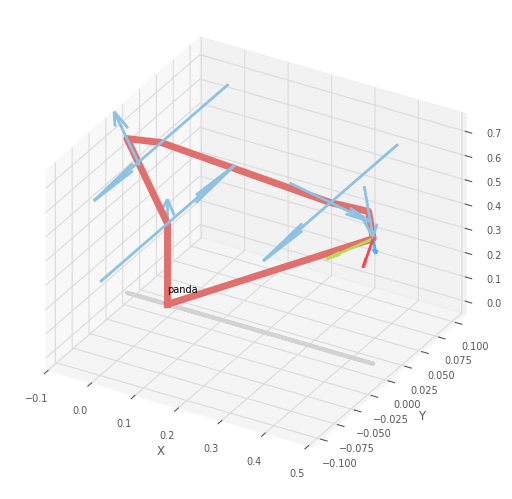

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

<Figure size 640x480 with 0 Axes>

In [22]:
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')

In [ ]:
robot.plot(qt.q)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# differential equation for the system
def euler_lagrange_eq(theta, t, m, g, L, tau_func):
    theta, theta_dot = theta
    theta_ddot = (tau_func(t) - m * g * L * np.sin(theta)) / (m * L**2)
    return [theta_dot, theta_ddot]

# time vector
t = np.linspace(0, 10, 1000)

# initial conditions: [initial angle, initial angular velocity]
theta0 = [0, 0]

# torque function (can be a constant or a function of time)
def tau_func(t):
    return 0.1  # constant torque

# parameters
m_value = 1.0
g_value = 9.8
L_value = 1.0

# solving the differential equation
sol = odeint(euler_lagrange_eq, theta0, t, args=(m_value, g_value, L_value, tau_func))

# extract the angles and angular velocities
theta = sol[:, 0]
theta_dot = sol[:, 1]

In [15]:
import roboticstoolbox as rtb
from spatialmath import SE3
import numpy as np

# Define a custom DHRobot with one joint
class OneJointRobot(rtb.DHRobot):
    def __init__(self):
        L = [  # List of links with DH parameters
            rtb.RevoluteDH(a=1, alpha=0)  # One revolute joint with link length 1
        ]
        super().__init__(L, name='OneJointRobot')

# Create an instance of the robot
robot = OneJointRobot()

# Print the robot's kinematic model
print(robot)

# Set initial joint configuration
q = [0]  # Joint angle

# Compute forward kinematics
T = robot.fkine(q)
print(T)

# Compute the Jacobian
J = robot.jacobe(q)
print(J)

# Example of using Euler-Lagrange equation for this robot
from sympy import symbols, Function, diff, cos

t = symbols('t')
theta = Function('theta')(t)
m, g, L = symbols('m g L')
tau = symbols('tau')

# Kinetic and potential energy
theta_dot = diff(theta, t)
T = 1/2 * m * (L * theta_dot)**2
V = m * g * L * cos(theta)

Lagrangian = T - V

# Euler-Lagrange equation
dL_dtheta = diff(Lagrangian, theta)
dL_dtheta_dot = diff(Lagrangian, theta_dot)
d_dt_dL_dtheta_dot = diff(dL_dtheta_dot, t)

euler_lagrange_eq = d_dt_dL_dtheta_dot - dL_dtheta - tau
print(euler_lagrange_eq)

# Example: Numerical values
m_value = 1.0  # mass
g_value = 9.8  # gravitational acceleration
L_value = 1.0  # link length

# Substitute numerical values
euler_lagrange_eq_numeric = euler_lagrange_eq.subs({m: m_value, g: g_value, L: L_value})
print(euler_lagrange_eq_numeric)

DHRobot: OneJointRobot, 1 joints (R), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

   1         0         0         1         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]
1.0*L**2*m*Derivative(theta(t), (t, 2)) - L*g*m*sin(theta(t)) - tau
-tau - 9.8*sin(theta(t)) + 1.0*Derivative(theta(t), (t, 2))


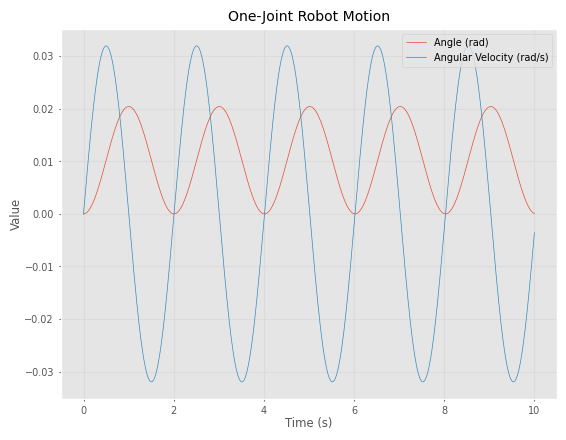

In [24]:
# plot
plt.figure()
plt.plot(t, theta, label='Angle (rad)')
plt.plot(t, theta_dot, label='Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.title('One-Joint Robot Motion')
plt.show()